In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as sklDecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
# iris.keys()
X.shape, y.shape

((150, 4), (150,))

In [3]:
# from sklearn.datasets import load_wine
# wine = load_wine()
# X, y = wine.data, wine.target
# X.shape, y.shape

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [5]:
import numpy as np
from collections import Counter
import random
from tree.decision_tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))
clf = DecisionTreeClassifier(max_depth=5, criterion='gini', extreme_random=True)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))
clf = sklDecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

0.9821428571428571 0.9210526315789473
0.9821428571428571 1.0
1.0 0.9736842105263158
1.0 0.9736842105263158


1.0 0.9736842105263158


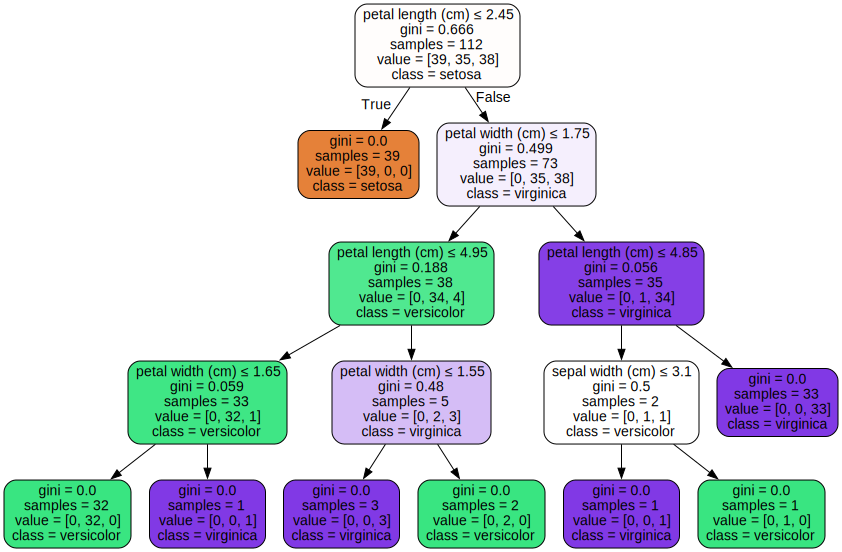

In [34]:
class RandomForestClassifier:
    """
    A Random Forest Classifier Machine Learning algorithm.

    Parameters:
        n_estimators (int): The number of decision trees to use
        max_tree_depth (int): The maximum depth of the component decision tree
        criterion (str): The criterion for splitting - 'gini' or 'entropy'
    """

    def __init__(self, n_estimators: int=100, max_tree_depth: int=20, criterion: str='gini'):
        self.n_estimators = n_estimators
        self.max_tree_depth = max_tree_depth
        self.criterion = criterion


    def fit(self, X: np.array, y: np.array):
        n_samples, n_features = X.shape
        assert n_samples == y.shape[0]
        assert len(y.shape) == 1 or y.shape[1] == 1

        return self

    
    def predict(self, X):
        y_pred = None
        return y_pred